In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\moham\Downloads\athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
df.rename(columns = {"Team" : "country"} , inplace = True)

In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'country', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df['country'].value_counts()

country
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Danzig               1
Hamburg              1
Formosa              1
Camille              1
Cuxhaven             1
Name: count, Length: 1184, dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1385)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe(include = ['object'])

,Name,Sex,country,NOC,Games,Season,City,Sport,Event,Medal
count,269731,269731,269731,269731,269731,269731,269731,269731,269731,39772
unique,134732,2,1184,230,51,2,42,66,765,3
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,39,195353,17598,18604,13821,221167,22297,38624,5733,13369


In [29]:
top = df [ df['Name'] == "Heikki Ilmari Savolainen"]
med = top [  top['Medal'].notna() ]
med.shape[0]

9

In [22]:
top.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
country     0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal      30
dtype: int64

In [41]:
## grouped by the athletes name to check how won the most medals and that is why I didn't fill in the null values
# because it counts all non-null values for medals
df.groupby("Name").agg(
total_medals = ("Medal" , "count")
).sort_values("total_medals" , ascending = False)

,total_medals
Name,
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Edoardo Mangiarotti,13
Takashi Ono,13
...,...
A. Hurtado Vargas,0
A. Hussain Ahmed,0
A. J. J. Fridt,0


In [38]:
df['Medal'] = df['Medal'].replace(0,'N/A')

In [40]:
df['Medal'] = df['Medal'].replace('N/A', np.nan)


In [116]:
age_check = (df.groupby("Sex").agg(
Avg_age = ("Age", 'mean')
)).round(0)
age_check

,Avg_age
Sex,
F,24.0
M,26.0


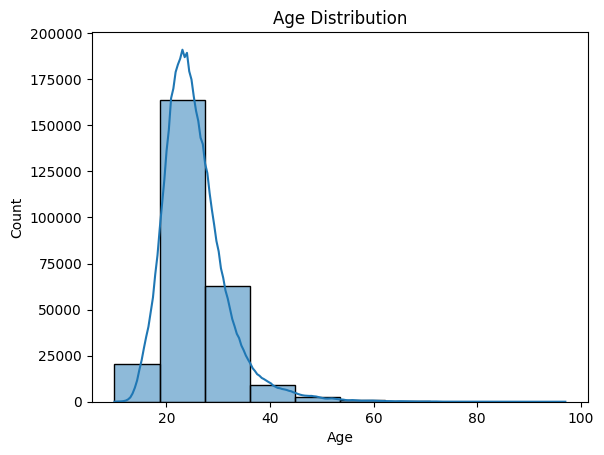

In [43]:
sns.histplot(data=df, x="Age", bins=10, kde=True)
plt.title("Age Distribution")
plt.show()


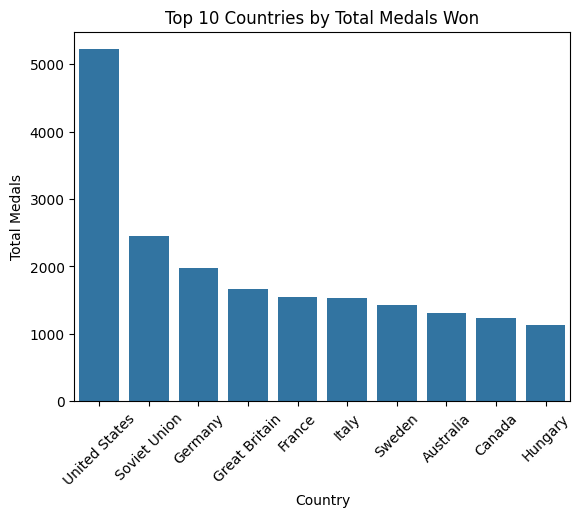

In [44]:
# Keep only rows where a medal was won
medals = df[df['Medal'].notna()]

# Count medals by country and take top 10
country_medals = (
    medals['country']
    .value_counts()
    .head(10)
    .reset_index()
)

country_medals.columns = ['Country', 'Total Medals']

# Plot
plt.figure()
sns.barplot(data=country_medals, x='Country', y='Total Medals')
plt.title("Top 10 Countries by Total Medals Won")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()

In [45]:
df.head()

,ID,Name,Sex,Age,Height,Weight,country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [52]:
## grouping by each sport to get an idea what is the avg weight and height of each sport
## the highest ones for ones that require more strength or need big athletes like basketball
avg_stats = (df.groupby("Sport").agg(
Avg_height = ("Height", "mean"),
Avg_weight = ("Weight", "mean") ) .round(2)
).sort_values("Avg_weight", ascending = False)
avg_stats

,Avg_height,Avg_weight
Sport,,
Tug-Of-War,182.48,95.62
Bobsleigh,181.44,89.25
Basketball,190.87,85.78
Baseball,182.60,85.71
Water Polo,184.83,84.57
...,...,...
Jeu De Paume,178.50,NaN
Military Ski Patrol,NaN,NaN
Polo,175.50,NaN


In [64]:
## checking which athlete is heaviest by their certain sport

filtered_df = df[df["Weight"].notna()]

heaviest_by_sport = (
    filtered_df
        .loc[filtered_df.groupby("Sport")["Weight"].idxmax(),
             ["Sport", "Name", "Weight"]]
        .sort_values("Weight", ascending=False)
        .reset_index(drop=True)
)

heaviest_by_sport



,Sport,Name,Weight
0,Judo,"Ricardo Blas, Jr.",214.0
1,Wrestling,Marek Galiski,190.0
2,Weightlifting,"Marcus Jerrold ""Mark"" Henry",176.5
3,Athletics,Ion Emilianov,165.0
4,Basketball,Sofoklis Schortsanitis,156.0
5,Bobsleigh,"Floyd Edward ""Hank"" Whisher",145.0
6,Shooting,Yavuz lnam,140.0
7,Boxing,Paea Wolfgramm,140.0
8,Rowing,"Edwin Darius ""Ed"" Graves, Jr.",137.0
9,Handball,Richrd Mezei,132.0


In [81]:
## how many male/female athletes are there and some athletes participate in more than one event so there names needed to be unique
## meaning no dups
sex_count = df.groupby("Sex")["Name"].nunique().sort_values(ascending=False)
sex_count

Sex
M    100979
F     33808
Name: Name, dtype: int64

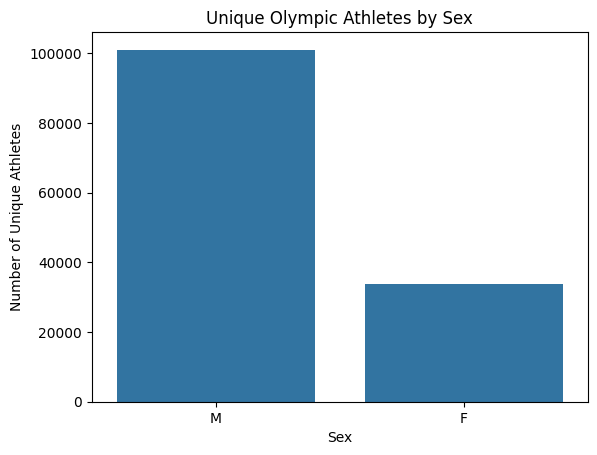

In [82]:
sex_df = sex_count.reset_index()
sex_df.columns = ["Sex", "Unique Athletes"]

plt.figure()
sns.barplot(data=sex_df, x="Sex", y="Unique Athletes")
plt.title("Unique Olympic Athletes by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Unique Athletes")
plt.show()

In [117]:
med = df [ df["Medal"].notna()]
med.shape[0]

39772

In [76]:
## which country won the most gold medals
med = df [ df["Medal"] == "Gold"]
med.groupby("country").agg(
Total_count = ("Medal", 'count')
).sort_values("Total_count", ascending = False)

,Total_count
country,
United States,2474
Soviet Union,1058
Germany,679
Italy,535
Great Britain,519
...,...
Singapore,1
United Arab Emirates,1
Syria,1


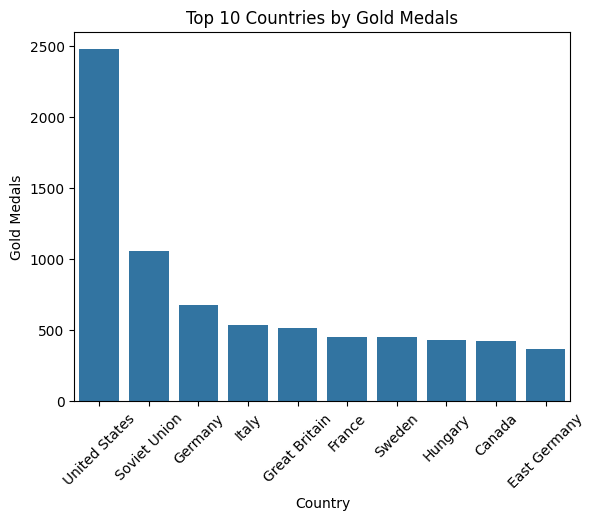

In [77]:
gold_counts = (
    med.groupby("country")
       .agg(Total_count=("Medal", "count"))
       .sort_values("Total_count", ascending=False)
       .head(10)
       .reset_index()
)

plt.figure()
sns.barplot(data=gold_counts, x="country", y="Total_count")
plt.title("Top 10 Countries by Gold Medals")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.xticks(rotation=45)
plt.show()

In [90]:
## to filter any you want and check the average weight for each sport and each sex in that sport
fil = df[ (df['Sport'] == "Wrestling") & (df['Sex'] == "M")]
filter = (fil.groupby(['Sport',"Sex"]).agg(
Avg_weight = ("Weight" , "mean")
).round(2) )
filter

,,Avg_weight
Sport,Sex,
Wrestling,M,76.4


In [91]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [102]:
## to check which country does best in combat sport and boxing is not included because usa always wins gold

combat = df[ (df["Sport"].isin(['Judo', 'Wrestling', 'Taekwondo' ]) ) & (df["Medal"] == "Gold") ]
combat.groupby(["country"]).agg(
Total_count = ("Medal" , "count")
).sort_values("Total_count" , ascending = False)

,Total_count
country,
Japan,71
Soviet Union,67
United States,56
South Korea,34
Russia,34
Turkey,31
Sweden,28
Finland,27
Hungary,20


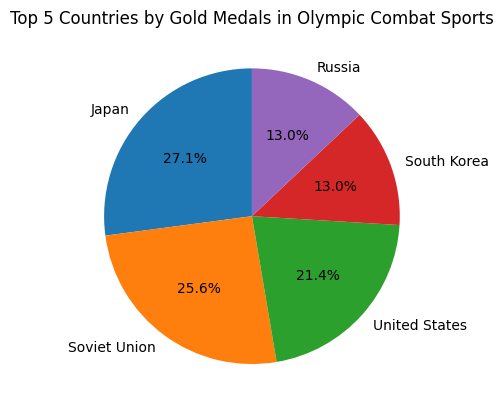

In [103]:
top5_combat_gold = (
    combat.groupby("country")
          .agg(Total_count=("Medal", "count"))
          .sort_values("Total_count", ascending=False)
          .head(5)
)

plt.figure()
plt.pie(
    top5_combat_gold["Total_count"],
    labels=top5_combat_gold.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Top 5 Countries by Gold Medals in Olympic Combat Sports")
plt.show()

In [106]:
df['Sport'].nunique()

66

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       269731 non-null  int64  
 1   Name     269731 non-null  object 
 2   Sex      269731 non-null  object 
 3   Age      260416 non-null  float64
 4   Height   210917 non-null  float64
 5   Weight   208204 non-null  float64
 6   country  269731 non-null  object 
 7   NOC      269731 non-null  object 
 8   Games    269731 non-null  object 
 9   Year     269731 non-null  int64  
 10  Season   269731 non-null  object 
 11  City     269731 non-null  object 
 12  Sport    269731 non-null  object 
 13  Event    269731 non-null  object 
 14  Medal    39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [112]:
## to see which  country won the most medals for each event

event_country_counts = (
    df[df["Medal"].notna()]
      .groupby(["Event", "country"])
      .size()
      .reset_index(name="Total_wins")
)

winners_by_event = (
    event_country_counts
      .sort_values(["Event", "Total_wins"], ascending=[True, False])
      .drop_duplicates(subset=["Event"], keep="first")
      .sort_values("Total_wins", ascending=False)
      .reset_index(drop=True)
)

winners_by_event


,Event,country,Total_wins
0,Ice Hockey Men's Ice Hockey,Canada,247
1,Basketball Men's Basketball,United States,222
2,Hockey Men's Hockey,India,173
3,Water Polo Men's Water Polo,Hungary,172
4,Swimming Men's 4 x 200 metres Freestyle Relay,United States,147
...,...,...,...
751,Freestyle Skiing Men's Halfpipe,Canada,1
752,Freestyle Skiing Women's Halfpipe,France,1
753,"Wrestling Men's Middleweight B, Greco-Roman",Finland,1
754,"Wrestling Women's Featherweight, Freestyle",Azerbaijan,1
